# **Importar librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import itertools
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.model_selection import KFold
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact
import ipywidgets as widgets 

from scipy import stats

**<h1>Limpieza de la base de datos HOUSES</h1>**

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Se utiliza una data la cual recolecta 21 características de diferentes tipos de casas que se encuentran a la venta.

Se especifican las características de:

    - id: ID del inmueble
    - date: Fecha del registro
    - price: El precio de venta del inmueble, (variable de respuesta)
    - bedrooms: Número de habitaciones
    - bathrooms: Número de baños
    - sqft_living: Pies cuadrados de espacio habitable
    - sqft_lot: Pies cuadrados del lote
    - floors: Pisos
    - waterfront: Frente al mar (Booleana)
    - view: Vista
    - condition: Condición del inmueble
    - grade: Calificación según expertos
    - sqft_above: Pies cuadrados de arriba
    - sqft_basement: Pies cuadrados de sótano
    - yr_built: Año de construcción
    - yr_renovated: Año de renovación
    - zipcode: Código postal
    - lat: Latitud
    - long: Longitud
    - sqft_living15: Pies cuadrados de espacio habitable
    - sqft_lot15: Pies cuadrados del lote

En análisis posteriores se observarán las variables necesarias para realizar la regresión y obtener el mejor modelo.


In [3]:
print(df.shape)
print(df.nunique())
print(df.info())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-n

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

Se eliminan las variables que no influyen en el modelo.


Se realiza una matriz de correlación para poder obtener las variables más correlacionadas a la variable de respuesta ('price'), así lograremos un mejor modelo.

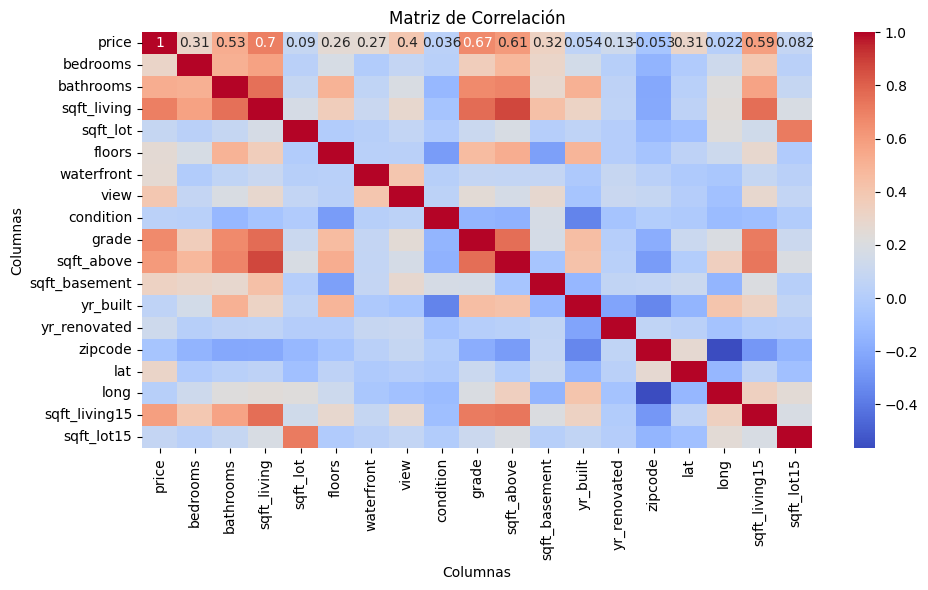

In [8]:
correlation_matrix = df.corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar la gráfica
plt.title('Matriz de Correlación')
plt.xlabel('Columnas')
plt.ylabel('Columnas')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Basado en la matriz de correlación se eliminan otro tipo de variable que no influyen en el modelo ya que no tienen correlación con la variable de respuesta. Además de disminuir las variables independientes para que la carga del modelo sea eficaz. 

Las variables escogidas para eliminar son: sqft_lot, condition, yr_built, zipcode, sqft_lot15, long, yr_renovated.

In [9]:

df.drop('sqft_lot', axis=1, inplace=True)
df.drop('condition', axis=1, inplace=True)
df.drop('yr_built', axis=1, inplace=True)
df.drop('zipcode', axis=1, inplace=True)
df.drop('sqft_lot15', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


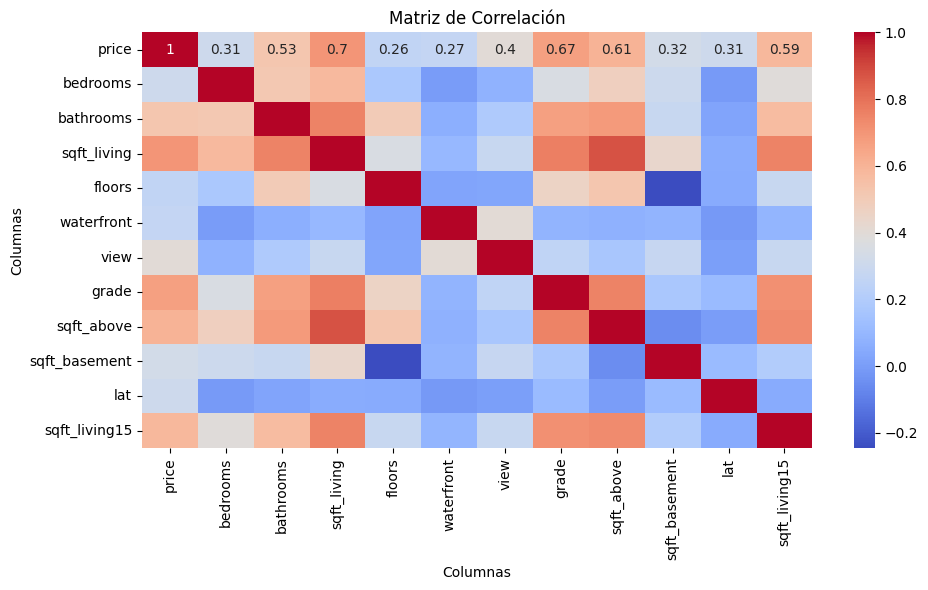

In [10]:
correlation_matrix = df.corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar la gráfica
plt.title('Matriz de Correlación')
plt.xlabel('Columnas')
plt.ylabel('Columnas')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

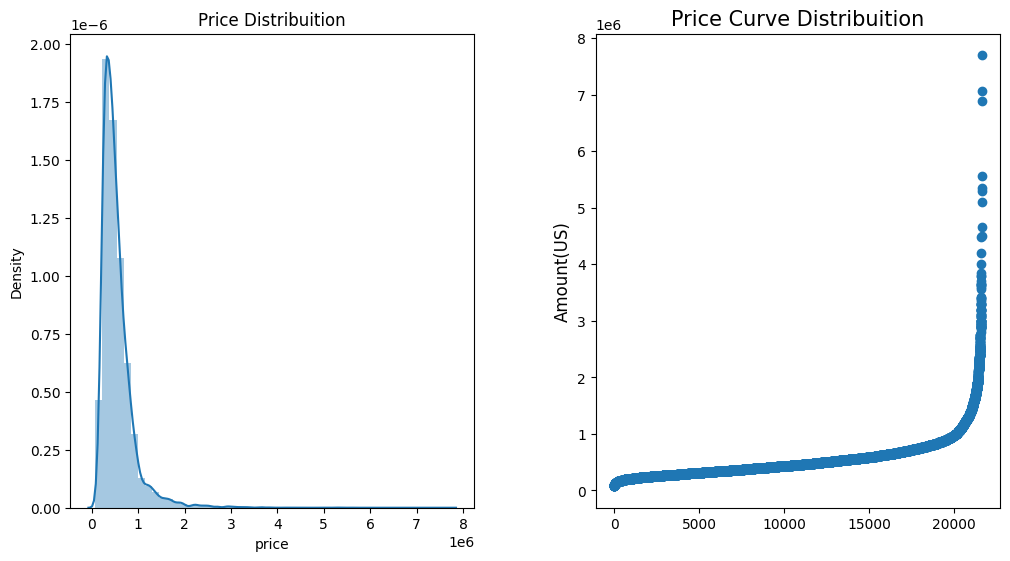

In [11]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df['price'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()


Se observa como la variable de precio tiene una distribución parecida a la normal recostada hacia la izquierda, la mayoría  se encuentran dentro de los valores de 0 a 2000000.
Y se observan unos pocos que tienen precios más altos que 8000000.
Con esta variable de respuesta trabajaremos para realizar la regresión.

<Figure size 800x500 with 0 Axes>

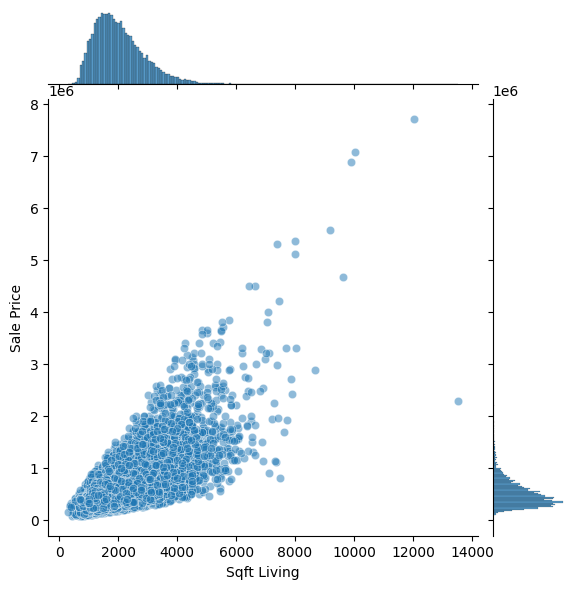

In [12]:
plt.figure(figsize=(8, 5))
sns.jointplot(data=df, x='sqft_living', y='price', alpha=0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

Se observa como mientras aumentan los pies cuadrados de la vivienda aumenta su precio, además de observar datos atipicos. 

Como el de un sqft living alto con un precio bajo, según el conocimiento de negocio se decide no borrarlo ya que con demás características del inmueble puede que tenga un precio más bajo a pesar de sus pies cuadrados. 


<Figure size 800x500 with 0 Axes>

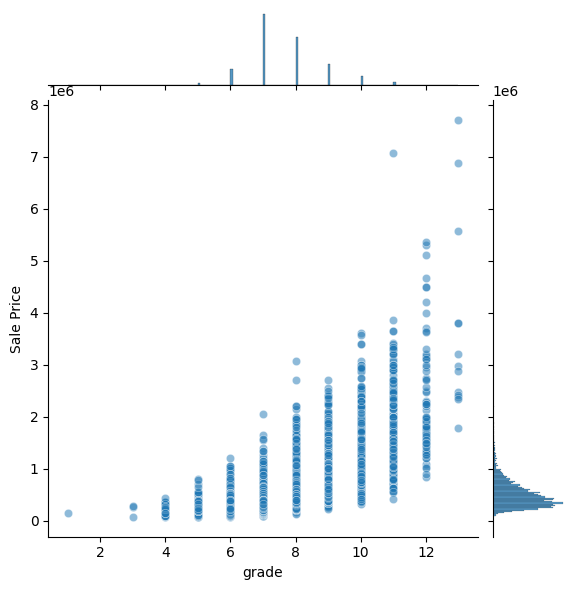

In [13]:
plt.figure(figsize=(8, 5))
sns.jointplot(data=df, x='grade', y='price', alpha=0.5)
plt.xlabel('grade')
plt.ylabel('Sale Price')
plt.show()

Además como se puede evidencíar mientras aumenta la calificación de la casa en cuanto a su estado se evidencía mayor precio.

**<h1>MODELO DE REGRESIÓN</H1>**

In [14]:
X = df[['bedrooms','bathrooms','sqft_living', 'floors','waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]
y_np=df['price']

Se establecen las variables independientes en este caso habiendo eliminado variables sin correlacion para el modelo. En total 11 variables predictoras. 

In [15]:
def get_models(k, X, y):
    """
    Fit all possible models that contain exactly k predictors.
    """
    # List all available predictors
    X_combos = itertools.combinations(list(X.columns), k)
    
    # Fit all models accumulating Residual Sum of Squares (RSS)
    models = []
    for X_label in X_combos:
        # Parse patsy formula
        X_smf = ' + '.join(X_label)
        f     = '{} ~ {}'.format(y.columns[0], X_smf)
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Return results
        models += [(f, model)]
    return models


def min_rss(statsmodels):
    """Return model with lowest Residual Sum of Squares (RSS)"""
    return sorted(statsmodels, key=lambda tup: tup[1].ssr)[0]


def max_adjr2(statsmodels):
    """Return model with max R-squared"""
    return sorted(statsmodels, reverse=True, key=lambda tup: tup[1].rsquared_adj)[0]

def min_bic(statsmodels):
    """Return model with min Bayes' Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].bic)[0]

def min_aic(statsmodels):
    """Return model with min Akaike's Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].aic)[0]


Se realizan diferentes k estableciendo diferentes combinaciones de variables para establecer el mejor modelo.

In [16]:

X = pd.DataFrame({'bedrooms': df["bedrooms"],
                  'bathrooms': df["bathrooms"],
                  'sqft_living': df["sqft_living"],
                  'floors': df["floors"],
                  'waterfront' : df['waterfront'],
                  'view': df["view"],
                  'grade': df["grade"],
                  'sqft_above': df["sqft_above"],
                  'sqft_basement': df["sqft_basement"],
                  'lat': df["lat"],
                  'sqft_living15': df["sqft_living15"]})
y = pd.DataFrame({'price':y_np})

# get all model results
model_subsets = []
for k in range(len(X.columns)):
    k=k+1
    subset = get_models(k, X, y)
    model_subsets += [subset]
    print('Progess: k = {}, done'.format(k))

Progess: k = 1, done
Progess: k = 2, done
Progess: k = 3, done
Progess: k = 4, done
Progess: k = 5, done
Progess: k = 6, done
Progess: k = 7, done
Progess: k = 8, done
Progess: k = 9, done
Progess: k = 10, done
Progess: k = 11, done


Dados los k , se grafican los indicadores para el mejor modelo. 

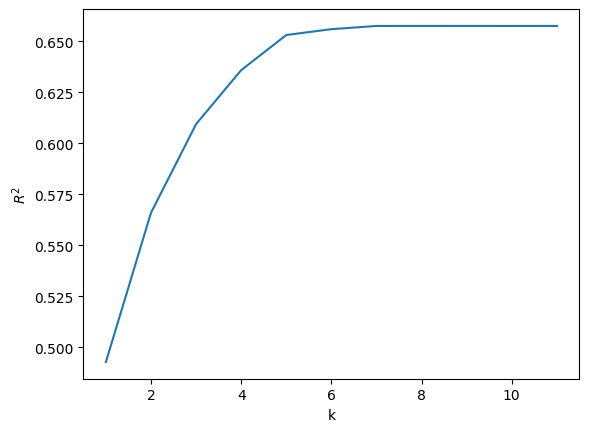

Model selected: 
Intercept       -3.238459e+07
bedrooms        -2.586301e+04
bathrooms       -3.523651e+03
sqft_living      1.941773e+02
floors          -2.917404e+04
waterfront       6.022287e+05
view             6.700453e+04
grade            8.219740e+04
lat              6.728480e+05
sqft_living15    4.394611e+00
dtype: float64


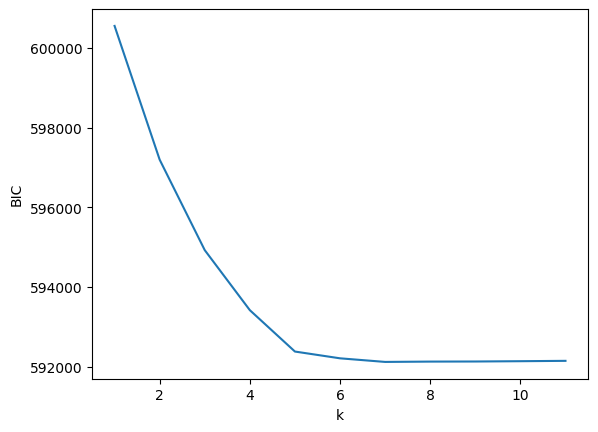

Model selected: 
Intercept     -3.239371e+07
bedrooms      -2.636042e+04
sqft_living    1.944347e+02
floors        -3.070622e+04
waterfront     6.016739e+05
view           6.724159e+04
grade          8.276113e+04
lat            6.730470e+05
dtype: float64


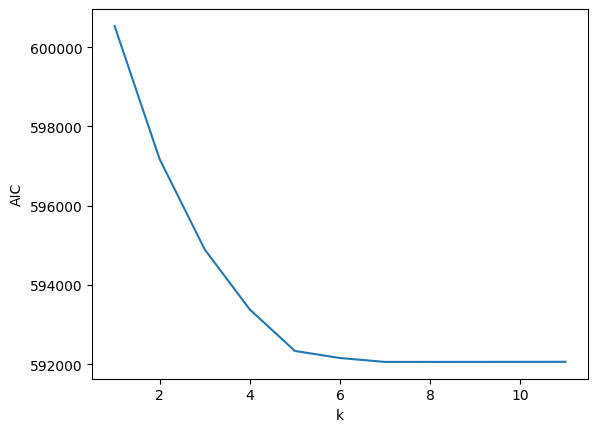

Model selected: 
Intercept     -3.239371e+07
bedrooms      -2.636042e+04
sqft_living    1.944347e+02
floors        -3.070622e+04
waterfront     6.016739e+05
view           6.724159e+04
grade          8.276113e+04
lat            6.730470e+05
dtype: float64


In [17]:
# Get predictor count
k = np.arange(1, len(X.columns)+1)

# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))

# Plot best r-squared score for each subset
adjr2 = [max_adjr2(m)[1].rsquared_adj for m in model_subsets]

sns.lineplot(x=k, y=adjr2)
plt.xlabel('k')
plt.ylabel('$R^2$')
plt.show()

# Select best subset
coefs_r2 = [(max_adjr2(m)[1].rsquared_adj, max_adjr2(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(max(coefs_r2)[1]))


# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))

# Get best BIC
bic = [min_bic(m)[1].bic for m in model_subsets]

sns.lineplot(x=k, y=bic)
plt.xlabel('k')
plt.ylabel('BIC')
plt.show()

# Select best subset
coefs_bic = [(min_bic(m)[1].bic, min_bic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_bic)[1]))


# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))

# Get best AIC
aic = [min_aic(m)[1].aic for m in model_subsets]

sns.lineplot(x=k, y=aic)
plt.xlabel('k')
plt.ylabel('AIC')
plt.show()

# Select best subset
coefs_aic = [(min_aic(m)[1].aic, min_aic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_aic)[1]))

Se utilizan 7 predictores dado a que se observa como el 7 es la mejor combinacion exceptuando por el r cuadrado donde son nueve. 

R^2:
bedrooms        -2.586301e+04
bathrooms       -3.523651e+03
sqft_living      1.941773e+02
floors          -2.917404e+04
waterfront       6.022287e+05
view             6.700453e+04
grade            8.219740e+04
lat              6.728480e+05
sqft_living15    4.394611e+00

BIC: 
bedrooms      -2.636042e+04
sqft_living    1.944347e+02
floors        -3.070622e+04
waterfront     6.016739e+05
view           6.724159e+04
grade          8.276113e+04
lat            6.730470e+05

AIC:
bedrooms      -2.636042e+04
sqft_living    1.944347e+02
floors        -3.070622e+04
waterfront     6.016739e+05
view           6.724159e+04
grade          8.276113e+04
lat            6.730470e+05

Y la combinación de variables para un mejor modelo es: 

bedrooms      
sqft_living   
floors        
waterfront    
view           
grade          
lat 

# Se realiza el modelo forward

In [114]:
def forward_stepwise(X, y, scorer='ssr', results=[(0, [])]):
    """Perform forward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.207)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all    = list(X.columns)
    p_used   = results[-1][1]
    p_unused = [p for p in p_all if p not in p_used]
    
    # Job done, exit recursion
    if not p_unused:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds}).drop(0)
    
    # Get score for each possible additional predictor
    r = []
    for p in p_unused:
        f     = '{} ~ {}'.format(y.columns[0], '+'.join([p]+p_used))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r    += [(model, [p]+p_used)]
    
    # Choose predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 
                        
    new_results = results + [best_score]
    # Recursive call to self
    return forward_stepwise(X, y, scorer, new_results)

In [115]:
def backward_stepwise(X, y, scorer='ssr', results=[]):
    """Perform backward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.209)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all = list(X.columns)

    # Check if we're starting out here
    if not results:
        # Fit model with all features
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_all))
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Begin backward stepwise recursion
        if scorer == 'ssr':
            return backward_stepwise(X, y, scorer, [(model.ssr, p_all)])
        if scorer == 'rsquared_adj':
            return backward_stepwise(X, y, scorer, [(model.rsquared_adj, p_all)])
        if scorer == 'bic':
            return backward_stepwise(X, y, scorer, [(model.bic, p_all)])
        if scorer == 'aic':
            return backward_stepwise(X, y, scorer, [(model.aic, p_all)])
    else:
        p_used = results[-1][1]
    
    # Job done, exit recursion
    if len(p_used) == 1:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds})    
    
    # Get rss score for each possible removed predictor
    r = []
    for p in p_used:
        p_test = [i for i in p_used if i != p]
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_test))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r     += [(model, p_test)]
    
    # Choose removal of predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 

    new_results = results + [best_score]
    # Recursive call to self
    return backward_stepwise(X, y, scorer, new_results)


def subset_analysis(df, scorer):
    """Renders results from forward_stepwise() and backward_stepwise()"""
    df['predictors_str'] = df['predictors'].astype(str)
    
    ax = sns.lineplot(x='predictors_str', y=scorer, data=df, sort=False)
    plt.xticks(rotation=90)
    plt.show();
    
    if scorer == 'rsquared_adj':
        display(df[df[scorer] ==  df[scorer].max()].drop('predictors_str', axis=1))
    else:
        display(df[df[scorer] ==  df[scorer].min()].drop('predictors_str', axis=1))

#### Forward stepwise selection

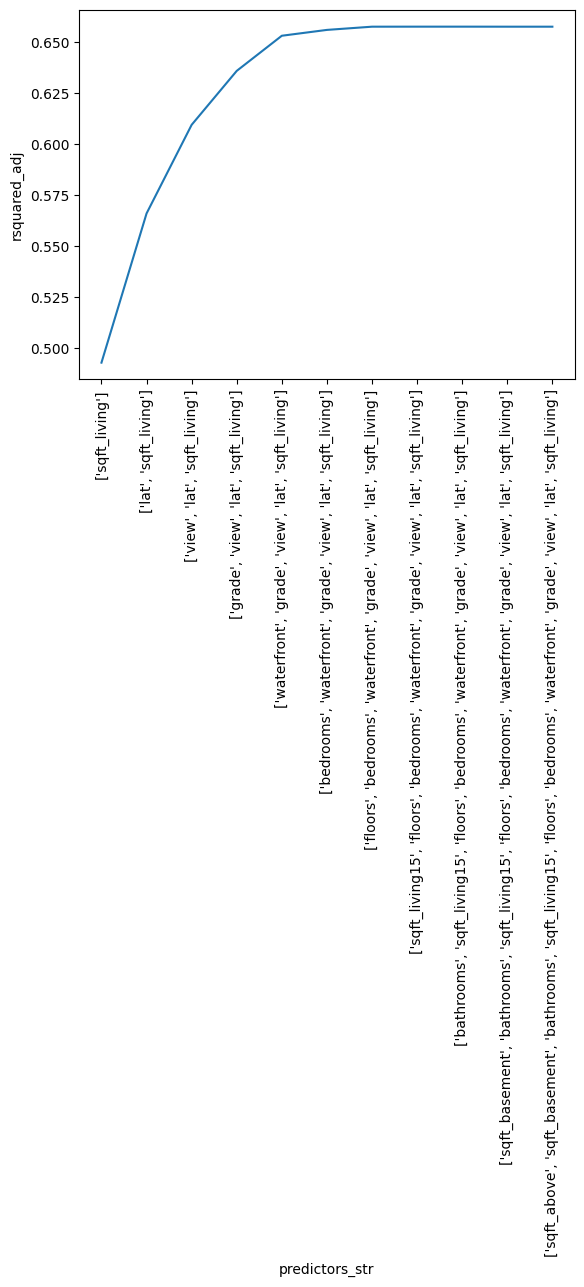

,rsquared_adj,predictors
9,0.657572,"[bathrooms, sqft_living15, floors, bedrooms, w..."


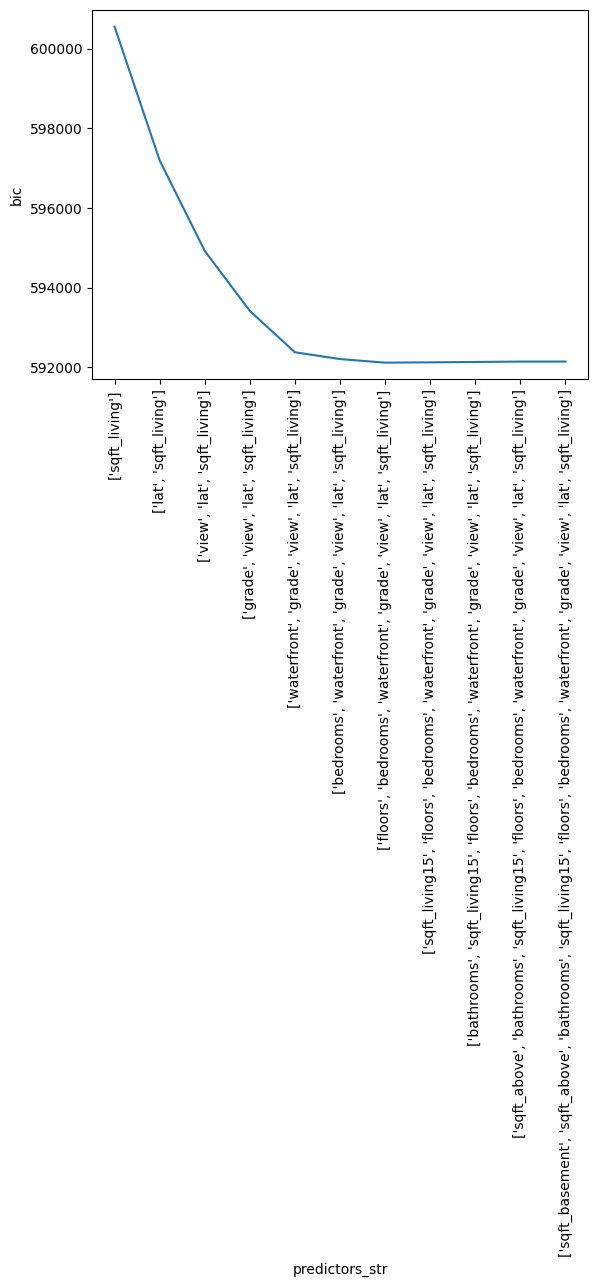

,bic,predictors
7,592120.060288,"[floors, bedrooms, waterfront, grade, view, la..."


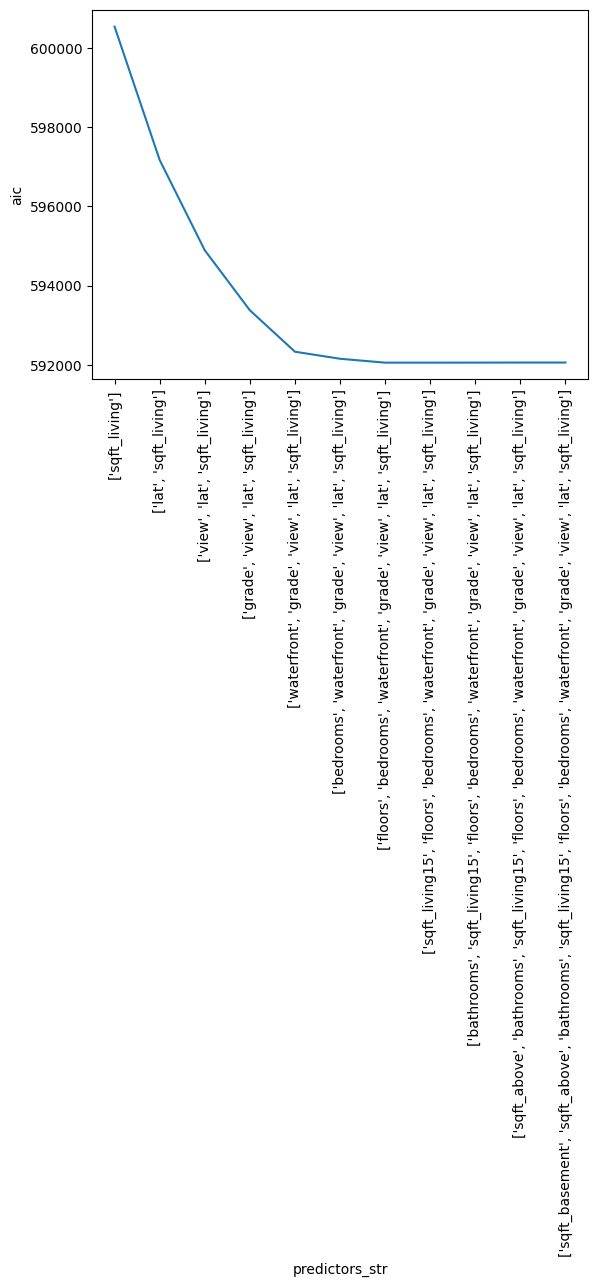

,aic,predictors
7,592056.211886,"[floors, bedrooms, waterfront, grade, view, la..."


In [121]:
# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)


En conclusión, cuando se observa que el indicador de R cuadrado ajustado (R^2 ajustado) selecciona un modelo con 9 predictores, mientras que los criterios de información de Akaike (AIC) y Bayes (BIC) seleccionan modelos con 7 predictores, se puede inferir lo siguiente:

El R^2 ajustado tiende a favorecer modelos con más predictores, ya que mide la proporción de la varianza explicada por el modelo. Por lo tanto, un modelo con más predictores puede resultar en un R^2 ajustado más alto, ya que se ajusta mejor a los datos observados.

Por otro lado, los criterios AIC y BIC penalizan la inclusión de predictores adicionales en el modelo. Prefieren modelos más simples que logren un buen ajuste pero con menos riesgo de sobreajuste. Esto se debe a que los modelos más simples son más fáciles de interpretar y generalizar a nuevas observaciones.

Por lo tanto, en este caso, la discrepancia entre el número de predictores seleccionados por el R^2 ajustado y los criterios AIC y BIC sugiere la importancia de considerar múltiples criterios al seleccionar el modelo óptimo en el análisis de regresión. Mientras que el R^2 ajustado puede estar más enfocado en ajustar los datos observados, los criterios AIC y BIC tienen en cuenta la parsimonia del modelo y el riesgo de sobreajuste, favoreciendo modelos más simples con menos predictores.

es decir que dado los valores del R^2 se recomienda hacer una limpieza de los outliers dentro de la base de datos o una limpieza mas profunda para que dentro de la evaluacion se encuentre un R^2 ajustado mas alto , siendo un modelo mas consecuente, esto puede a deberse a que  variables como el price  y las medidas cuadradas tienen valores atipicos muy fuera de la tendencia dentro de la serie de datos.

#### Backward stepwise selection

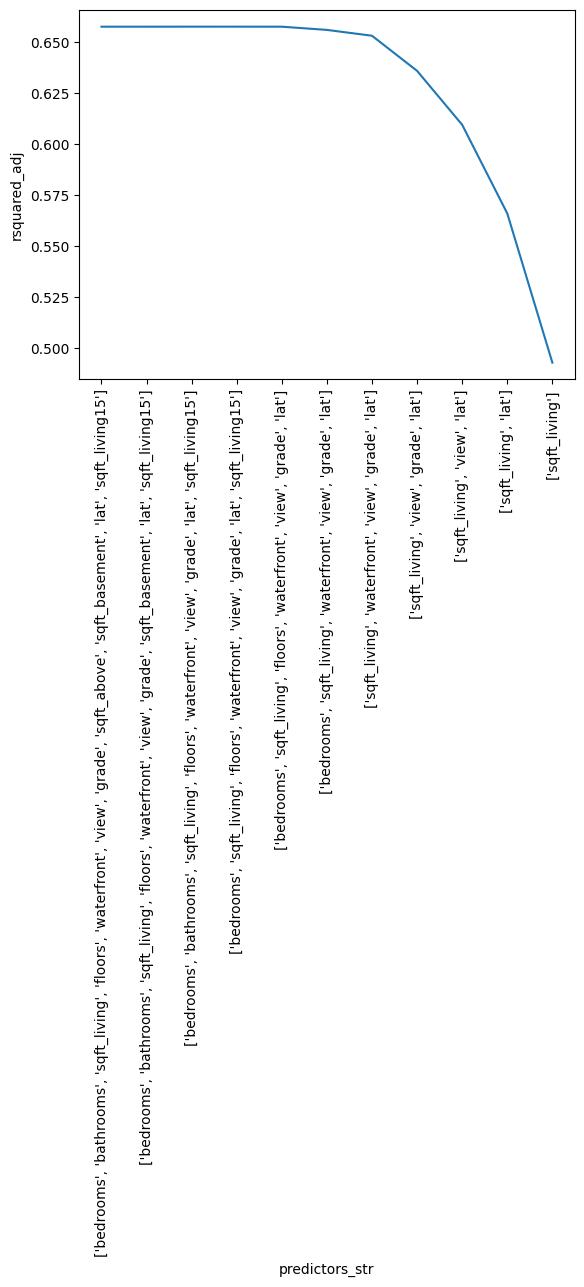

,rsquared_adj,predictors
2,0.657572,"[bedrooms, bathrooms, sqft_living, floors, wat..."


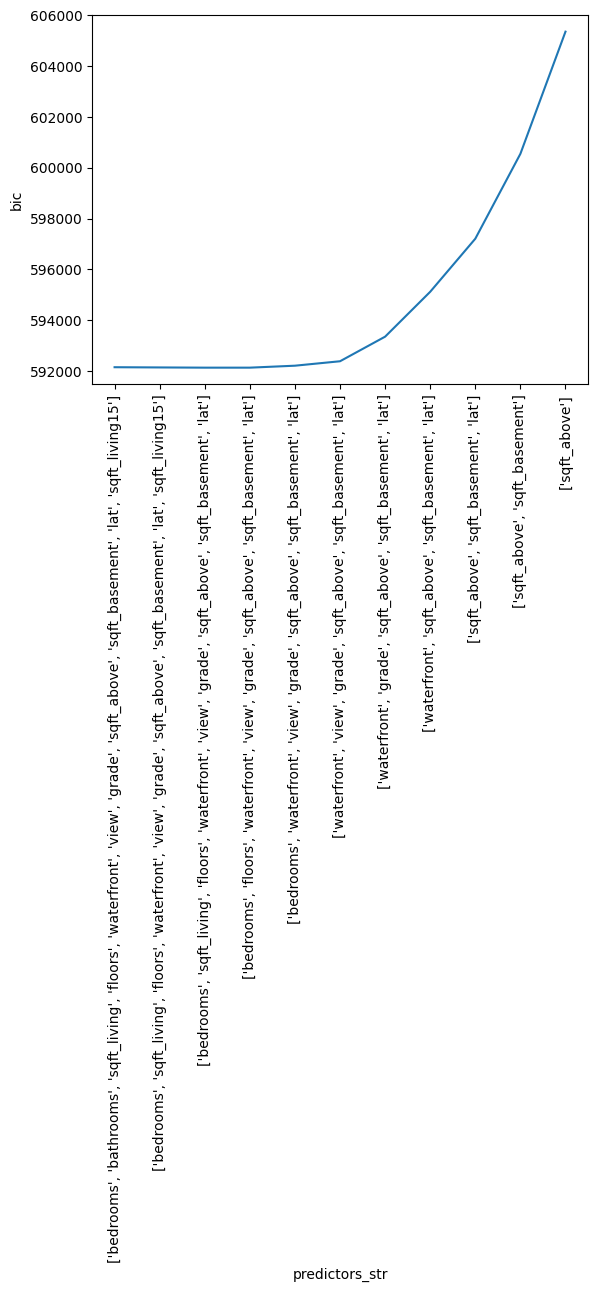

,bic,predictors
2,592129.743048,"[bedrooms, sqft_living, floors, waterfront, vi..."
3,592129.743048,"[bedrooms, floors, waterfront, view, grade, sq..."


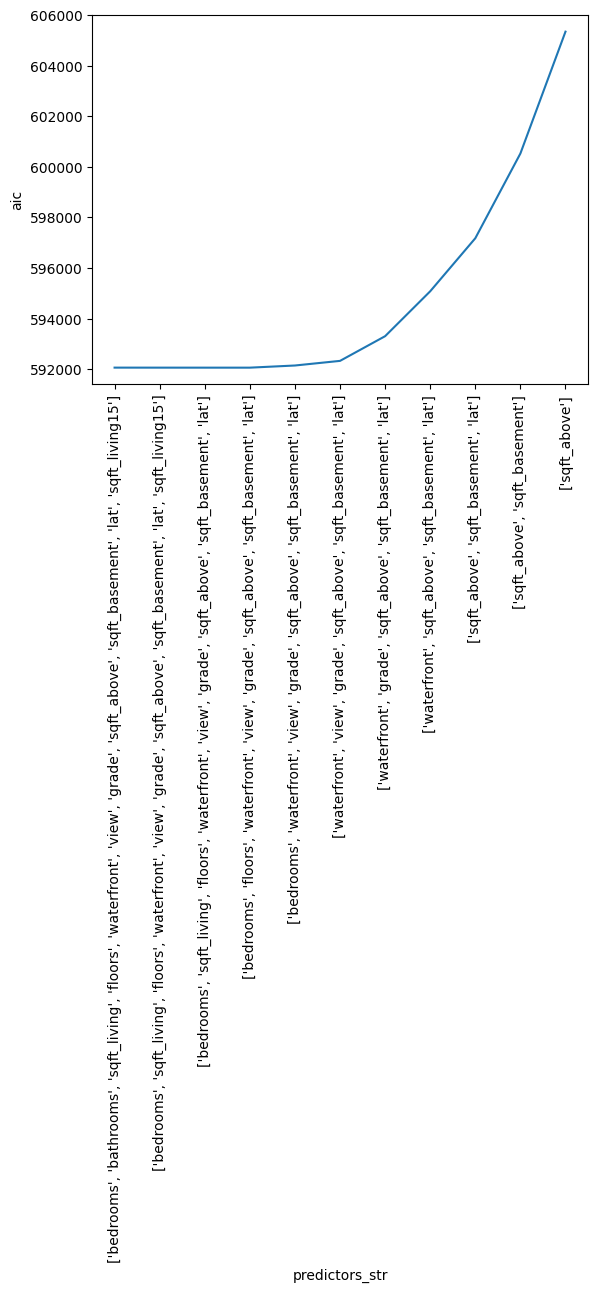

,aic,predictors
2,592057.913596,"[bedrooms, sqft_living, floors, waterfront, vi..."
3,592057.913596,"[bedrooms, floors, waterfront, view, grade, sq..."


In [118]:
# adjr2
# ------------------------------------------------
display(HTML('<h6>Adjusted R^2</h6>'))
scorer = 'rsquared_adj'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h6>Bayes\' Information Criteria</h6>'))
scorer = 'bic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h6>Akaike\'s Information Criteria</h6>'))
scorer = 'aic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

 El modelo selecciona  11 predictores para obtener un R^2 ajustado relativamente alto, lo que sugiere que es capaz de explicar una proporción considerable de la variabilidad en la variable objetivo.

 Aunque el modelo con 11 predictores puede tener un buen ajuste según el R^2 ajustado, los criterios AIC y BIC penalizan la inclusión de predictores adicionales. El modelo con 11  predictores podría ser preferido por tener un AIC y un BIC más bajos, lo que indica una mejor compensación entre el ajuste del modelo y su complejidad. Sin embargo, el modelo con 10 predictores también podría ser considerado si la mejora en la calidad del ajuste justifica el costo adicional de la complejidad del modelo.

<h1>CONCLUSIÓN</h1>

Dado que tanto el AIC como el BIC son más bajos para el modelo forward  y el R² es igual para ambos modelos, el modelo forward sería preferible según estos criterios. Esto sugiere que el model forward proporciona un mejor ajuste a los datos observados con menos complejidad, lo que lo convierte en una opción preferible.

Una base de datos con muchas variables, relaciones no lineales o complejas, multicolinealidad y la necesidad de modelos simples y interpretables puede favorecer el uso del método de selección hacia adelante sobre el método de selección hacia atrás siendo esto una posible razon de que se elija el metodo hacia adelante.

Además se observa como las variables independientes escogidas por este modelo tienen sentido en el caso de negocio ya que un aumento o disminucipon de una de estas puede cambiar el precio de venta de las casas. 

En resumen, el modelo forward puede ser preferible en este caso debido a su enfoque progresivo, su tendencia a seleccionar modelos más simples y su menor riesgo de sobreajuste. Estas características hacen que el modelo forward proporcione un mejor equilibrio entre el ajuste del modelo y su complejidad, lo que lo convierte en una opción preferible según los criterios de AIC y BIC.




